In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import scipy.stats as sts
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
#Measurement
#Station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb101825400>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [32]:
# Calculate the date 1 year ago from the last data point in the database

#for row in session.query(Measurement.tobs, Measurement.date, Measurement.station, Measurement.prcp, Measurement.id).order_by(Measurement.date).all():
climate_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-23').all()
for row in climate_data:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-11', 0.0)
('2017-01-13', None)
('2017-01-14', 0.0)
('2017-01-16', None)
('2017-01-17', 0.0)
('2017-01-18', 0.0)
('2017-01-19', 0.0)
('2017-01-20', 0.0)
('2017-01-21', 0.02)
('2017-01-23', None)
('2017-01-25', None)
('2017-01-26', 0.01)
('2017-01-27', 0.0)
('2017-01-28', 0.0)
('2017-01-30', None)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-05', None)
('2017-02-06', 0.04)
('2017-02-07', 0.9)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 2.39)
('2017-02-12', 1.91)
('2017-02-13', 0.0)
('2017-02-14', 0.0)
('2017-02-15', 0.0)
('2017-02-16', 0.62)
('2017-02-17', 0.06)
('2017-02-20', None)
('2017-02-21', 0.0)
('2017-02-22', 0.11)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-26', None)
('2017-02-27', 0.0)
('2017-02-28', 0.04)
('2017-03-01', 1.12)
('2017-03-03', None)
('2017-03-06', None)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.5)
('2017-03-10', 0.13)

('2017-01-04', 0.18)
('2017-01-05', 0.42)
('2017-01-06', 0.01)
('2017-01-07', 0.0)
('2017-01-08', 0.0)
('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-12', None)
('2017-01-15', None)
('2017-01-16', 0.0)
('2017-01-18', None)
('2017-01-19', 0.0)
('2017-01-20', 0.0)
('2017-01-21', 0.11)
('2017-01-22', 0.04)
('2017-01-23', 0.0)
('2017-01-24', 0.08)
('2017-01-25', 0.0)
('2017-01-26', 0.0)
('2017-01-27', 0.0)
('2017-01-29', None)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-04', 0.0)
('2017-02-05', 0.0)
('2017-02-06', 0.0)
('2017-02-07', 1.8)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 5.04)
('2017-02-12', 0.07)
('2017-02-13', 0.0)
('2017-02-15', None)
('2017-02-16', 0.67)
('2017-02-17', 0.06)
('2017-02-18', 0.01)
('2017-02-20', None)
('2017-02-22', 0.13)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-26', None)
('2017-02-27', 0.0)
('2017-02-28', 0.0)
('2017-03-01', 0.59)
('2017-03-02', 1.48)

In [36]:
# Perform a query to retrieve the data and precipitation scores
# dates = [data[1] for data in climate_data[:]]
# prcps = [data[3] for data in climate_data[:]]
# #prcps
plot_df= pd.DataFrame(climate_data, columns=['date', 'prcp'])
plot_sorted_df = plot_df.sort_values('date')
plot_sorted_df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# plot_df = pd.DataFrame({
#     'date' : dates
#     ,'prcp' : prcps
# })
# #plot_indexed_df = plot_df.set_index('date')

# # Sort the dataframe by date
# plot_sorted_df = plot_df.sort_values(by=['date'])
# plot_sorted_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


Text(0, 0.5, 'Inches')

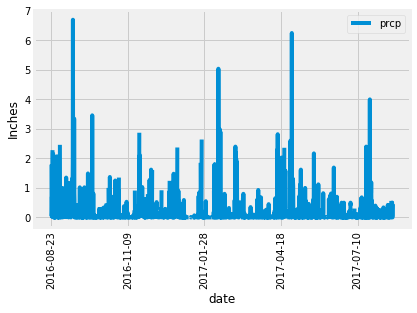

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data

plot_sorted_df.plot(x='date', y='prcp', rot=90)
plt.ylabel("Inches")
#plt.show()

#Use Pandas to print the summary statistics for the precipitation data.



In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean_prcp = np.mean(plot_sorted_df['prcp'])
print(f"Average precipitation is {mean_prcp}")

median_prcp = np.median(plot_sorted_df['prcp'])
print(f"Median precipitation is {median_prcp}")

mode_prcp = sts.mode(plot_sorted_df['prcp'])
print(f"Mode precipitation is {mode_prcp}")

var_prcp = np.var(plot_sorted_df['prcp'])
print(f"Variance of precipitation measurements is {var_prcp}")

st_dev_prcp = np.std(plot_sorted_df['prcp'])
print(f"Standard Deviation of precipitation measurements is {st_dev_prcp}")


Average precipitation is 0.17727857496288968
Median precipitation is nan
Mode precipitation is ModeResult(mode=array([0.]), count=array([874]))
Variance of precipitation measurements is 0.21259051566664816
Standard Deviation of precipitation measurements is 0.46107539043701756


In [16]:
# Design a query to show how many stations are available in this dataset?
one_row = session.query(Station).first()
one_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb1032af7b8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [17]:
station_all_data = session.query(Station.station, Station.latitude, Station.elevation, Station.id, Station.name, Station.longitude).all()
for data_row in station_all_data:
    print(data_row)

('USC00519397', 21.2716, 3.0, 1, 'WAIKIKI 717.2, HI US', -157.8168)
('USC00513117', 21.4234, 14.6, 2, 'KANEOHE 838.1, HI US', -157.8015)
('USC00514830', 21.5213, 7.0, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374)
('USC00517948', 21.3934, 11.9, 4, 'PEARL CITY, HI US', -157.9751)
('USC00518838', 21.4992, 306.6, 5, 'UPPER WAHIAWA 874.3, HI US', -158.0111)
('USC00519523', 21.33556, 19.5, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139)
('USC00519281', 21.45167, 32.9, 7, 'WAIHEE 837.5, HI US', -157.84888999999998)
('USC00511918', 21.3152, 0.9, 8, 'HONOLULU OBSERVATORY 702.2, HI US', -157.9992)
('USC00516128', 21.3331, 152.4, 9, 'MANOA LYON ARBO 785.2, HI US', -157.8025)


In [18]:
station_data = session.query(Station.station).count()
station_data


9

In [19]:
# stations_grouped = session.query(Measurement.station, Measurement.tobs).count()
# stations_grouped

#Output: 19550

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_list = session.query(Measurement.station, func.count('*')).group_by(Measurement.station).order_by(func.count('*').desc()).all()
stations_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#('USC00519281', 2772) - Highest number of observations
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
#lowest_temp

[(54.0, 85.0, 71.66378066378067)]

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date>='2016-08-23').all()
for point in temp_data:
    print(point)

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

In [50]:
hist_df= pd.DataFrame(temp_data, columns=['date', 'tobs'])
hist_sorted_df = hist_df.sort_values('date')
hist_sorted_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


Text(0, 0.5, 'Frequency')

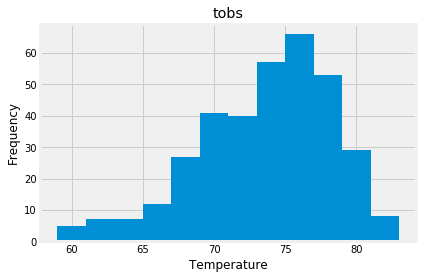

In [52]:
hist = hist_sorted_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

## Bonus Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
